# Amazon text based recommendation system

 In this part the product is recommended based on the title of the given apparel based here i applied some of the NLP concepts like "Bag of Words","TFIDF vectorizer","IDF vectorizer"and sentiment analysis of title features.

In [1]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
46,B01NACPBG2,Fifth Degree,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,$6.95


# Bag of words on title text based  recommendation system

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape()

(16042, 12609)

In [4]:
def display_img(url,ax,fig):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)) 
    plt.imshow(img)

def plot_heatmap(keys, values, labels, url, text):
        
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        ax = plt.subplot(gs[0])
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys)
        ax.set_title(text) 
        
        ax = plt.subplot(gs[1])
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
    
        display_img(url, ax, fig)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    for i in vec2:
        if i not in intersection:
            vec2[i]=0
    keys = list(vec2.keys()) 
    values = [vec2[x] for x in vec2.keys()]
    
    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    
    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    return Counter(words) 



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

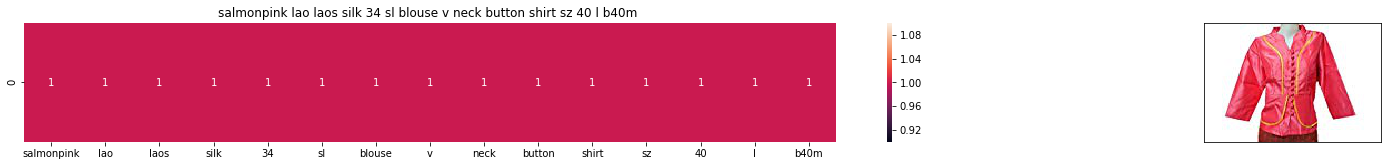

ASIN : B06XRXGD55
Brand: Nanon
Title: salmonpink lao laos silk 34 sl blouse v neck button shirt sz 40 l b40m 
Euclidean similarity with the query image : 0.0


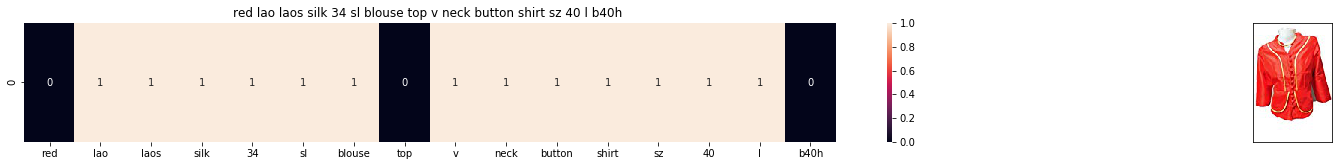

ASIN : B01IN9CH28
Brand: Nanon
Title: red lao laos silk 34 sl blouse top v neck button shirt sz 40 l b40h 
Euclidean similarity with the query image : 2.23606797749979


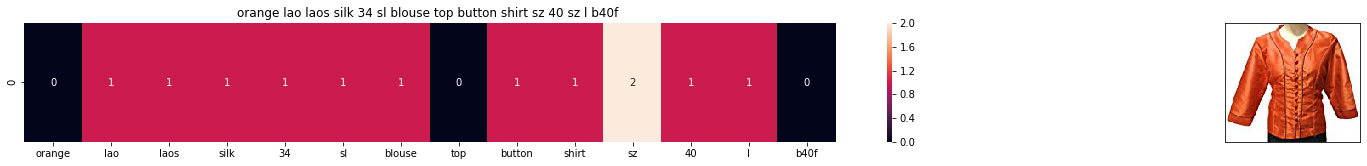

ASIN : B06XGY6TYL
Brand: Nanon
Title: orange lao laos silk 34 sl blouse top button shirt sz 40 sz l b40f 
Euclidean similarity with the query image : 2.6457513110645907


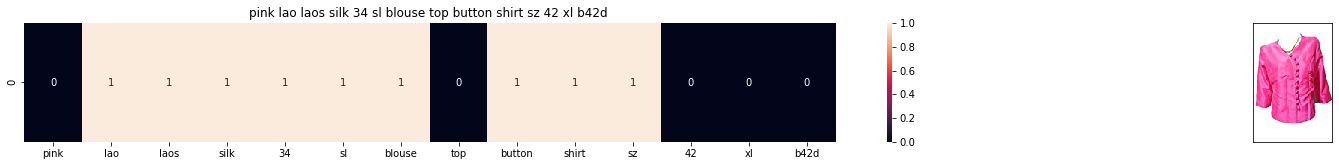

ASIN : B01IODIUR4
Brand: Nanon
Title: pink lao laos silk 34 sl blouse top button shirt sz 42 xl b42d 
Euclidean similarity with the query image : 3.0


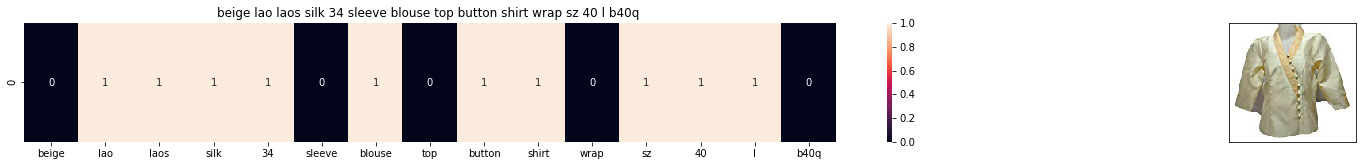

ASIN : B01LW6G077
Brand: Nanon
Title: beige lao laos silk 34 sleeve blouse top button shirt wrap sz 40 l b40q 
Euclidean similarity with the query image : 3.0


In [5]:
def bag_of_words_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

bag_of_words_model(1600, 5)

# Tfidf vectorizer on title based Recommendation system

In [6]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
tfidf_title_features.shape

(16042, 12609)

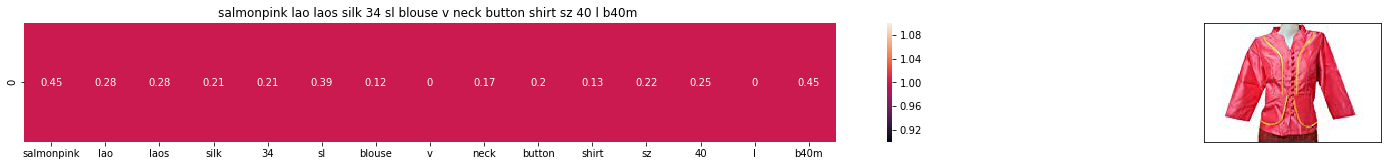

ASIN : B06XRXGD55
BRAND : Nanon
Eucliden distance from the given image : 0.0


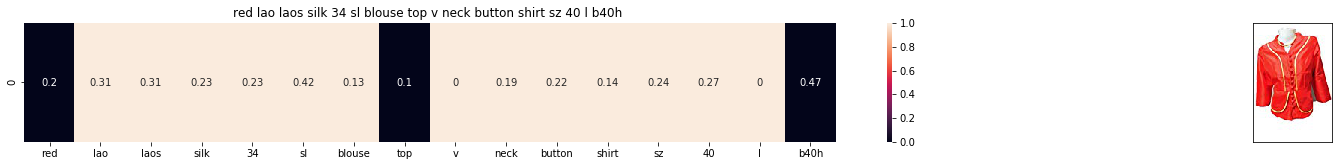

ASIN : B01IN9CH28
BRAND : Nanon
Eucliden distance from the given image : 0.8243892418360391


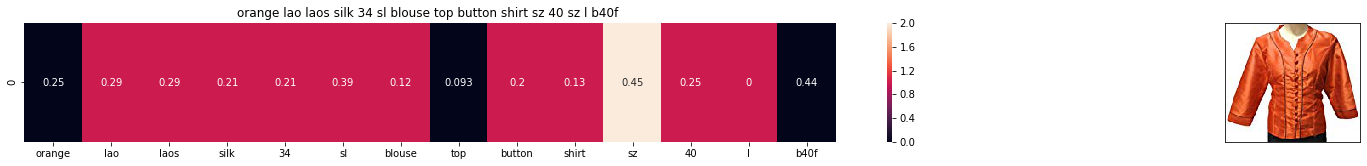

ASIN : B06XGY6TYL
BRAND : Nanon
Eucliden distance from the given image : 0.8608775229060845


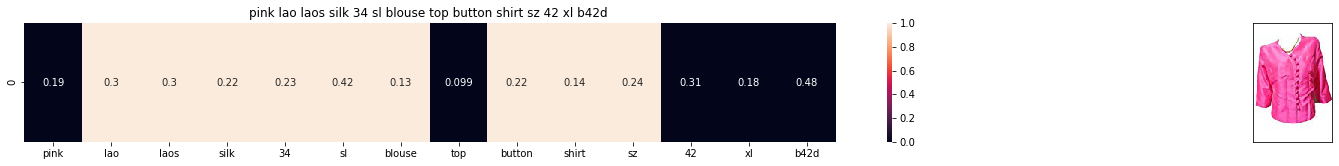

ASIN : B01IODIUR4
BRAND : Nanon
Eucliden distance from the given image : 0.9481110091844026


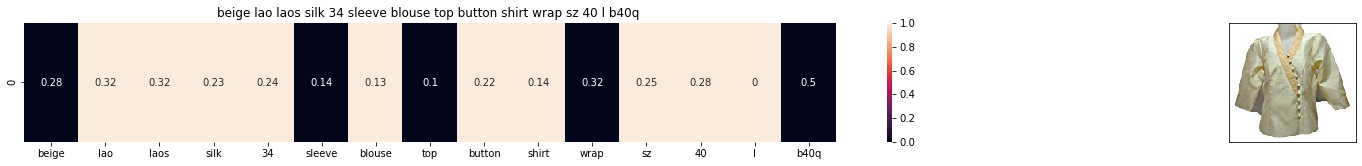

ASIN : B01LW6G077
BRAND : Nanon
Eucliden distance from the given image : 1.0234257727044518


In [7]:
def tfidf_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
tfidf_model(1600, 5)

# IDF on title based recommendation system

In [8]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])
idf_title_features.shape

(16042, 12609)

In [9]:
def n_containing(word):
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    return math.log(data.shape[0] / (n_containing(word)))

In [10]:
idf_title_features  = idf_title_features.astype(np.float)

for i in idf_title_vectorizer.vocabulary_.keys():
    idf_val = idf(i)
    for j in idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0]:
        idf_title_features[j,idf_title_vectorizer.vocabulary_[i]] = idf_val
        

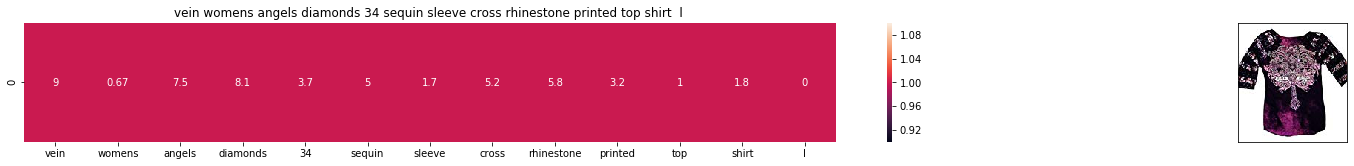

ASIN : B01NAZ3L3C
Brand : Fifth Degree
euclidean distance from the given image : 0.0


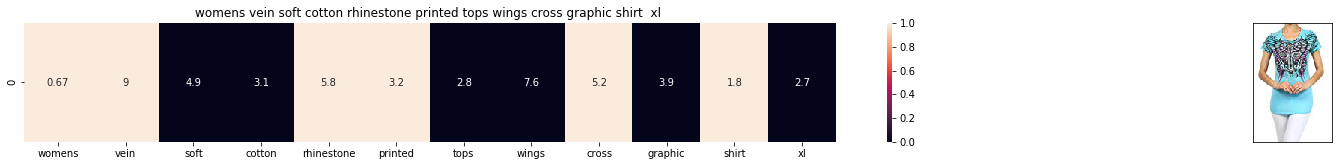

ASIN : B01MDLV4MA
Brand : Fifth Degree
euclidean distance from the given image : 16.91854055372451


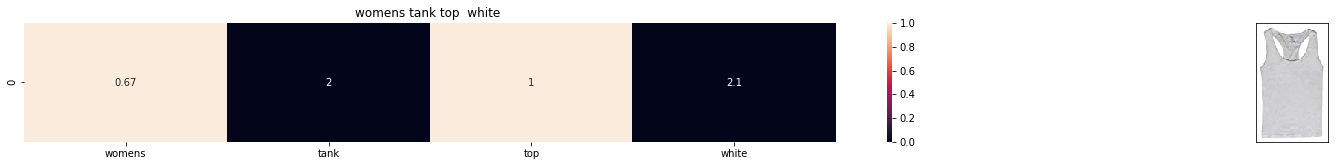

ASIN : B00JPOZ9GM
Brand : Sofra
euclidean distance from the given image : 18.03859840752593


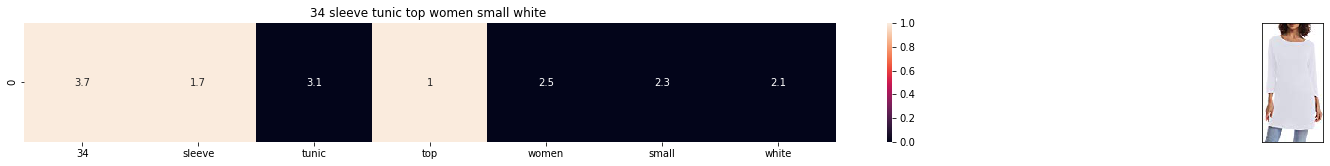

ASIN : B071ZS52Z2
Brand : TBONTB
euclidean distance from the given image : 18.076915991891216


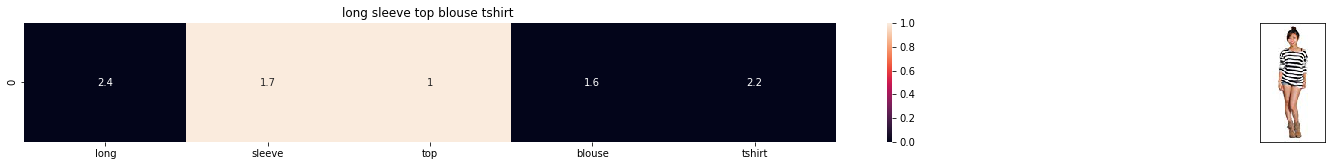

ASIN : B00KF2N5PU
Brand : Vietsbay
euclidean distance from the given image : 18.107243079781732


In [30]:
def idf_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'idf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from the given image :', pdists[i])
        print('='*125)

        
        
idf_model(10,5)

# Applying sentiment analysis on title based recommendation system

In [18]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)

In [23]:
def get_word_vec(sentence, doc_id, m_name):
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            vec.append(np.zeros(shape=(300,)))
    return  np.array(vec)

def get_distance(vec1, vec2):
    final_dist = []
    for i in vec1:
        dist = []
        for j in vec2:
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    return np.array(final_dist)


def heat_map_w2v(sentence1, sentence2, url, doc_id1, doc_id2, model):
    s1_vec = get_word_vec(sentence1, doc_id1, model)
    s2_vec = get_word_vec(sentence2, doc_id2, model)
    s1_s2_dist = get_distance(s1_vec, s2_vec)
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    ax.set_xticklabels(sentence2.split())
    ax.set_yticklabels(sentence1.split())
    ax.set_title(sentence2)
    
    ax = plt.subplot(gs[1])
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    display_img(url, ax, fig)
    
    plt.show()

In [24]:
vocab = model.keys()
def build_avg_vec(sentence, num_features, doc_id, m_name):
    featureVec = np.zeros((num_features,), dtype="float32")
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    return featureVec

In [25]:
doc_id = 0
w2v_title = []
for i in data['title']:
    w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
    doc_id += 1 
w2v_title = np.array(w2v_title)


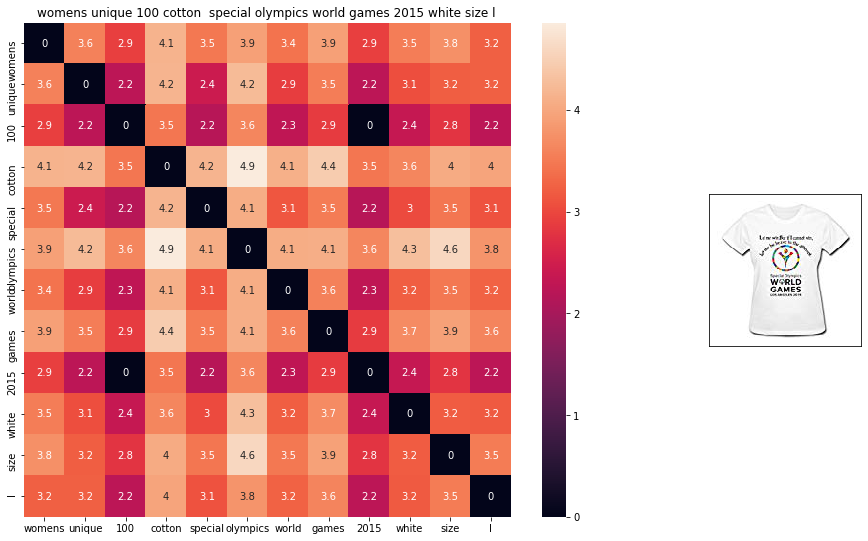

ASIN : B012YX2ZPI
BRAND : HX-Kingdom Fashion T-shirts
euclidean distance from given input image : 0.0


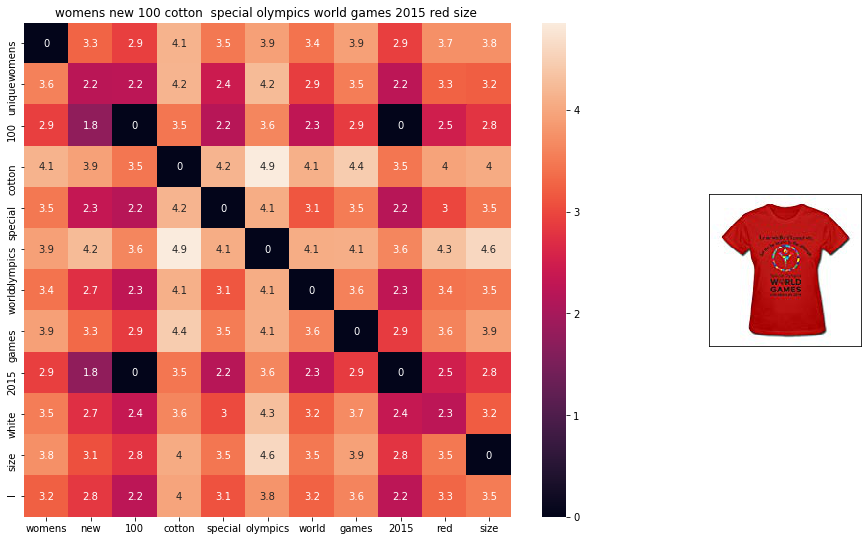

ASIN : B012YX3I5E
BRAND : HX-Kingdom Fashion T-shirts
euclidean distance from given input image : 0.3285239


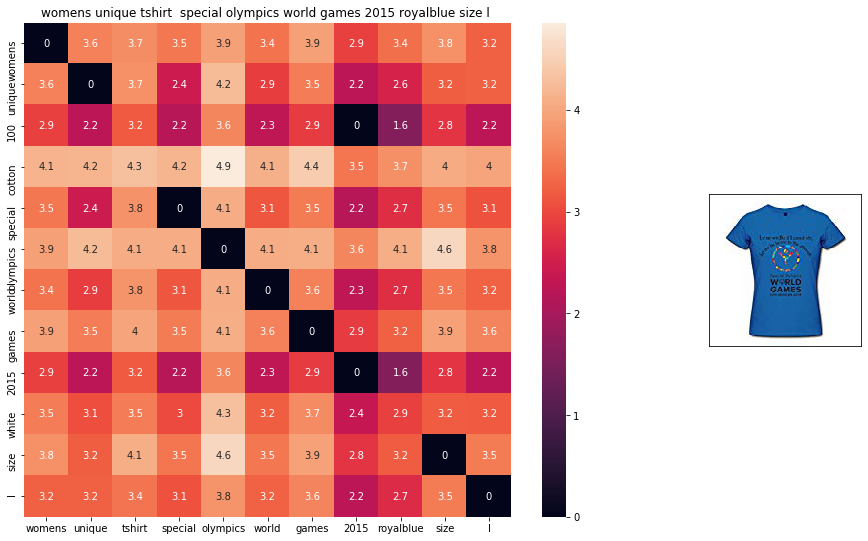

ASIN : B012YX4TVG
BRAND : HX-Kingdom Fashion T-shirts
euclidean distance from given input image : 0.46198404


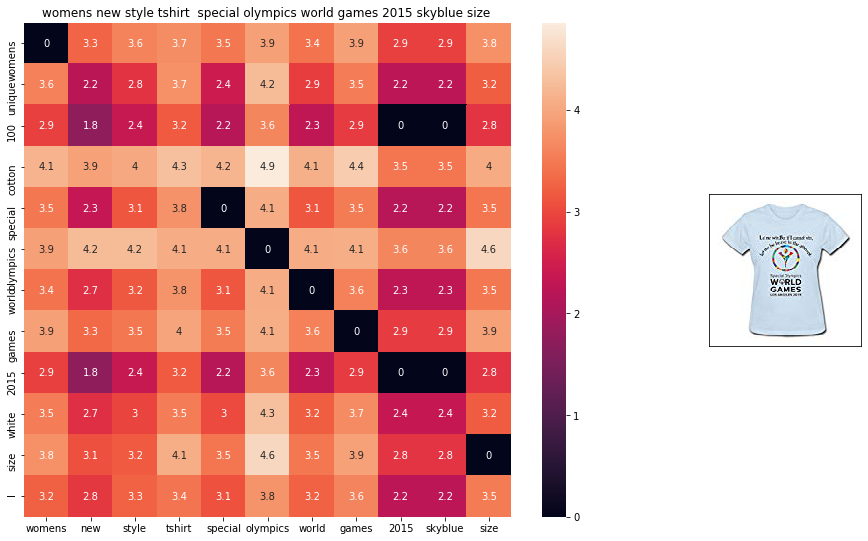

ASIN : B012YX2OJU
BRAND : HX-Kingdom Fashion T-shirts
euclidean distance from given input image : 0.5157693


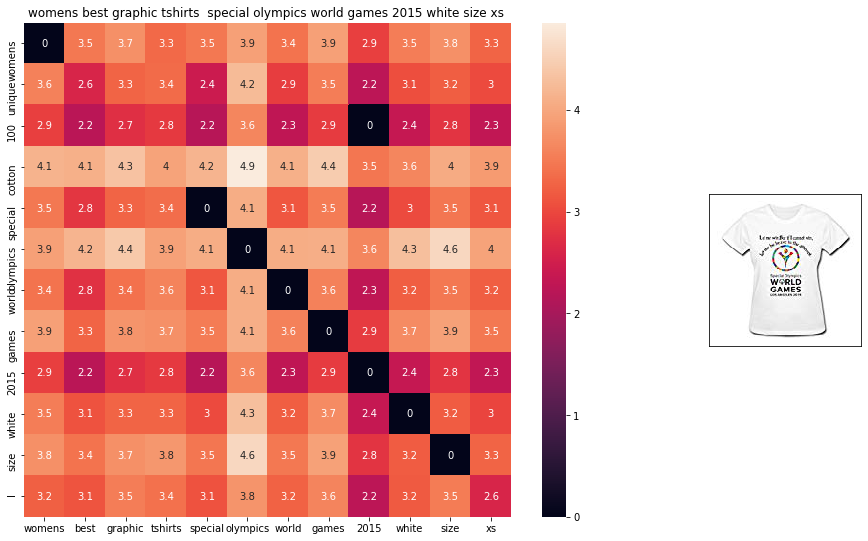

ASIN : B012YX2M3I
BRAND : HX-Kingdom Fashion T-shirts
euclidean distance from given input image : 0.52464926


In [27]:
def avg_w2v_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(w2v_title, w2v_title[doc_id].reshape(1,-1))
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'avg')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from given input image :', pdists[i])
        print('='*125)

        
avg_w2v_model(1, 5)

In [31]:
doc_id = 0
w2v_title_weight = []
for i in data['title']:
    w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1
w2v_title_weight = np.array(w2v_title_weight)

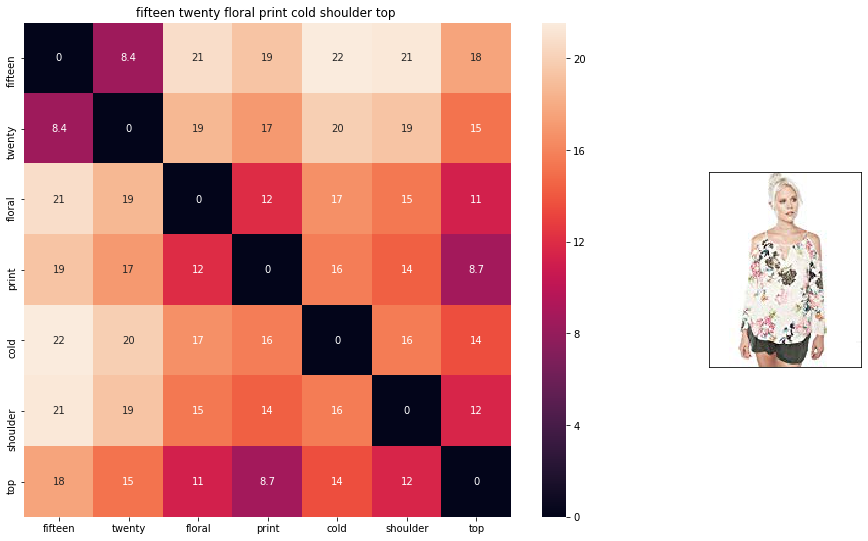

ASIN : B06XJ66M4P
Brand : FIFTEEN TWENTY
euclidean distance from input : 0.0


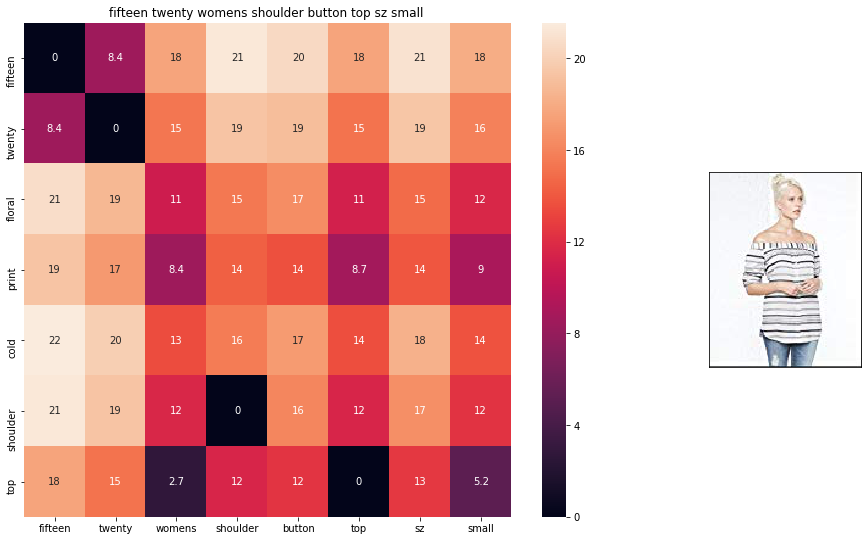

ASIN : B074KT1R5Y
Brand : FIFTEEN TWENTY
euclidean distance from input : 3.430526


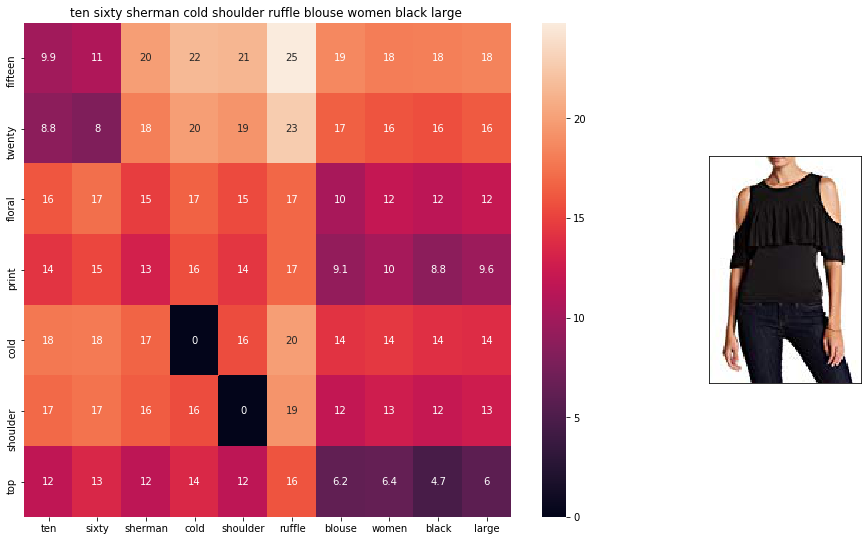

ASIN : B07539L2XP
Brand : Ten Sixty Sherman
euclidean distance from input : 3.7897673


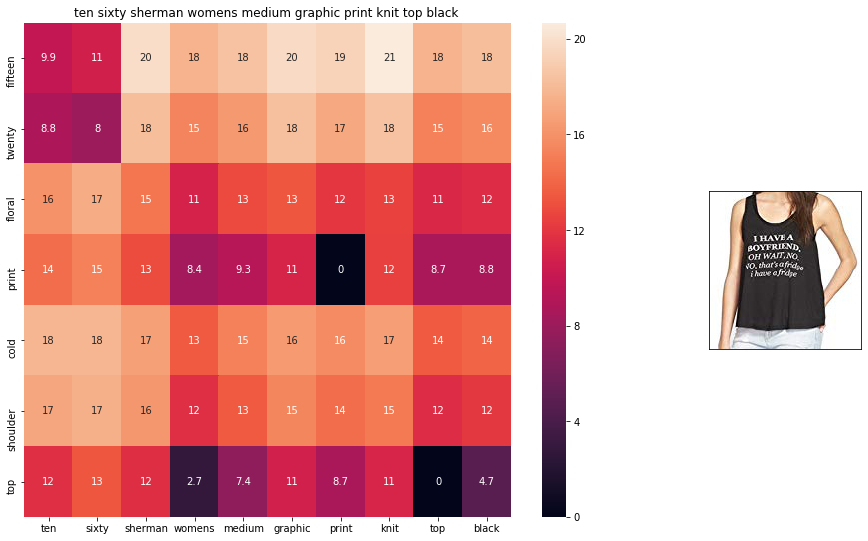

ASIN : B06XCX7NBX
Brand : Ten Sixty Sherman
euclidean distance from input : 4.226468


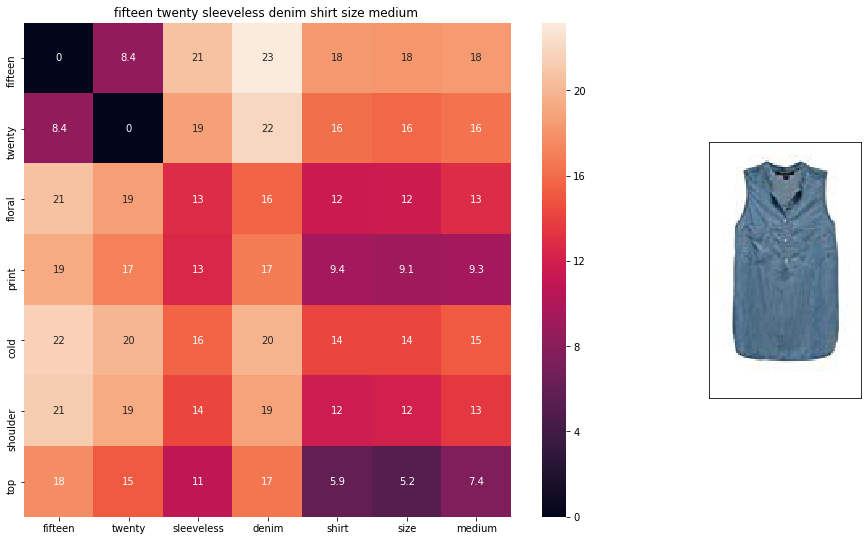

ASIN : B01IFYEVQG
Brand : FIFTEEN TWENTY
euclidean distance from input : 4.252473


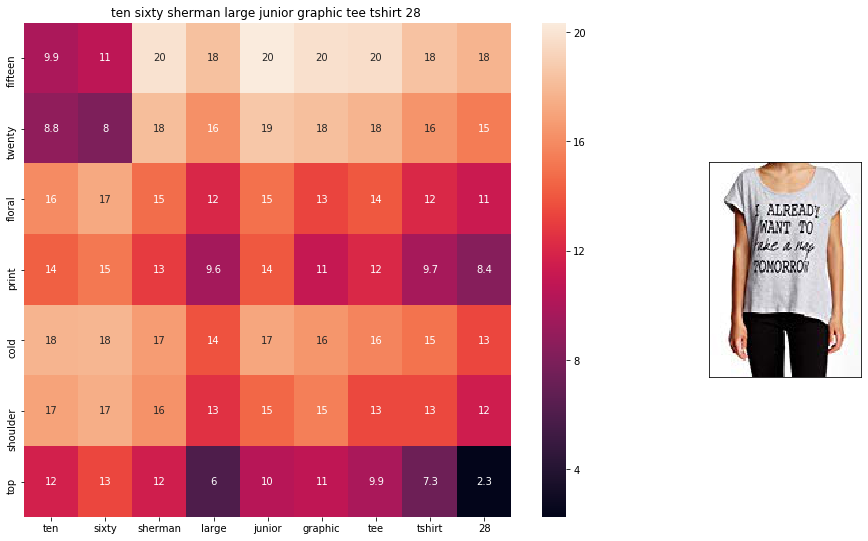

ASIN : B0758VYDD3
Brand : Ten Sixty Sherman
euclidean distance from input : 4.2566705


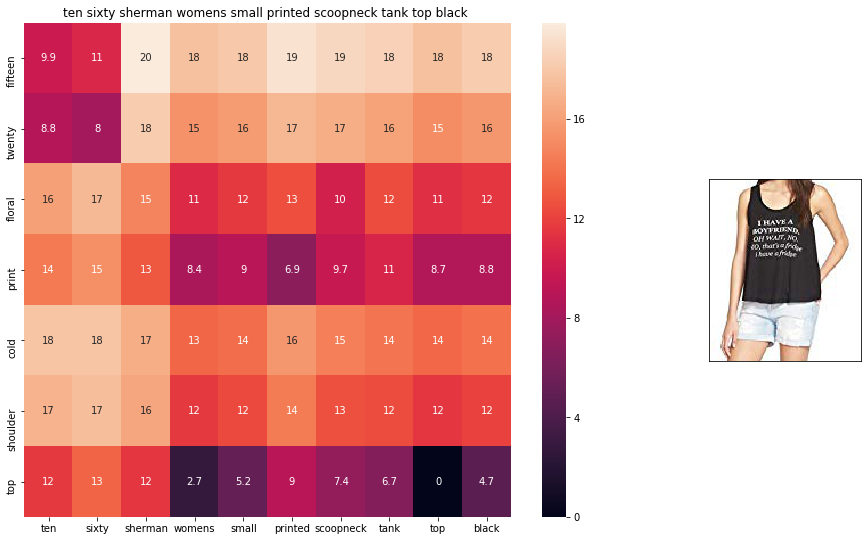

ASIN : B0716Y2M56
Brand : Ten Sixty Sherman
euclidean distance from input : 4.2596464


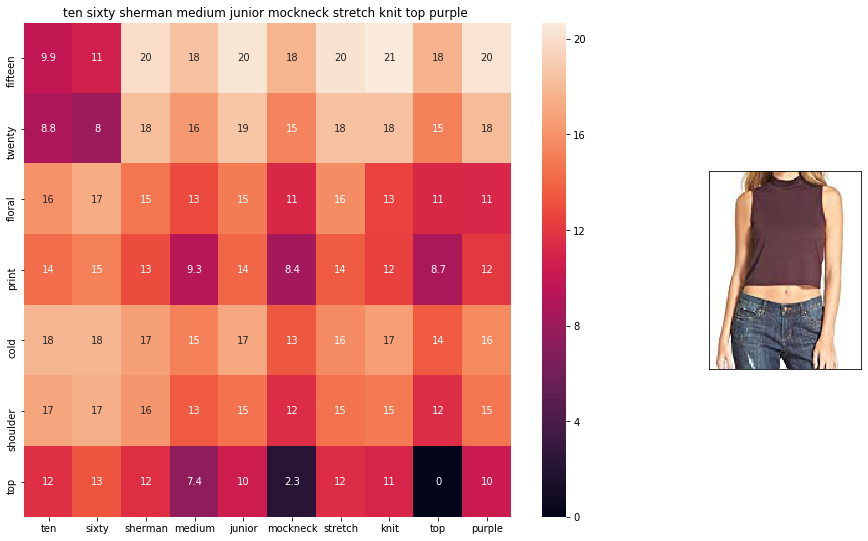

ASIN : B01J297UCU
Brand : Ten Sixty Sherman
euclidean distance from input : 4.2639756


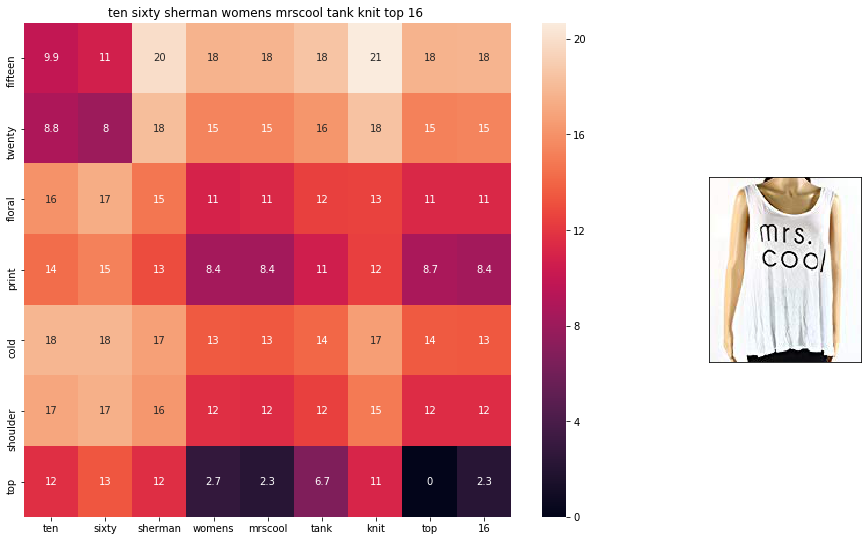

ASIN : B0758Q6RR9
Brand : Ten Sixty Sherman
euclidean distance from input : 4.271689


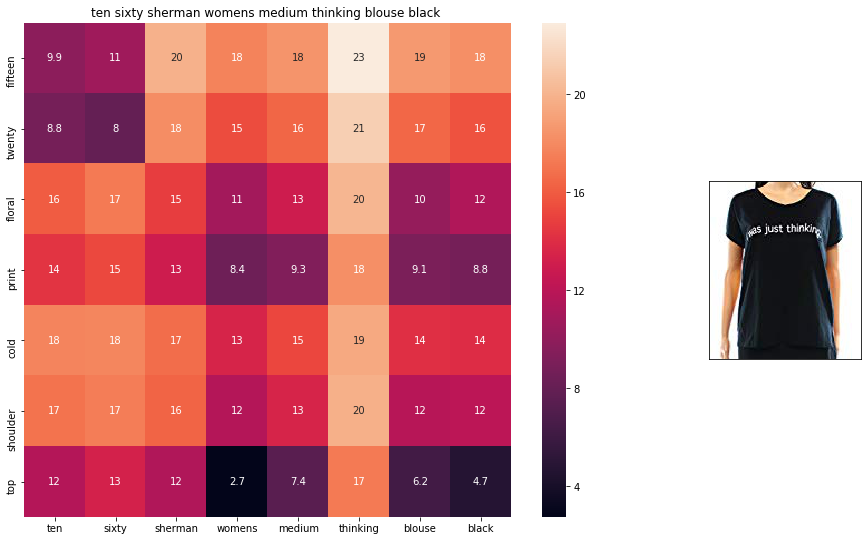

ASIN : B0731961H8
Brand : Ten Sixty Sherman
euclidean distance from input : 4.3625193


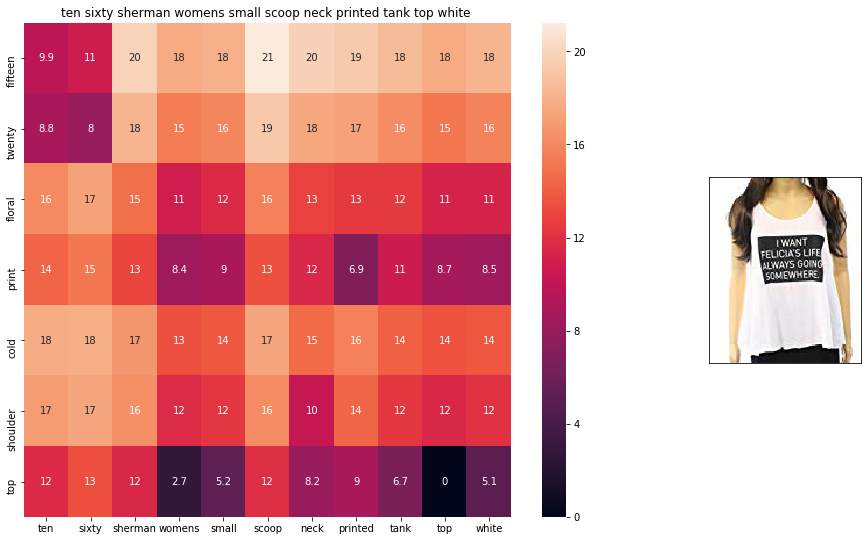

ASIN : B01G1Y32YY
Brand : Ten Sixty Sherman
euclidean distance from input : 4.3670015


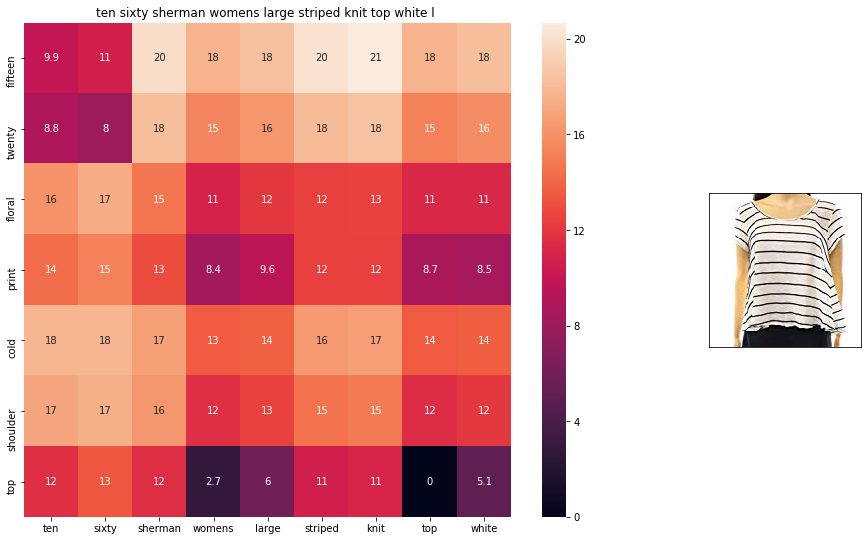

ASIN : B072LTP6LG
Brand : Ten Sixty Sherman
euclidean distance from input : 4.386339


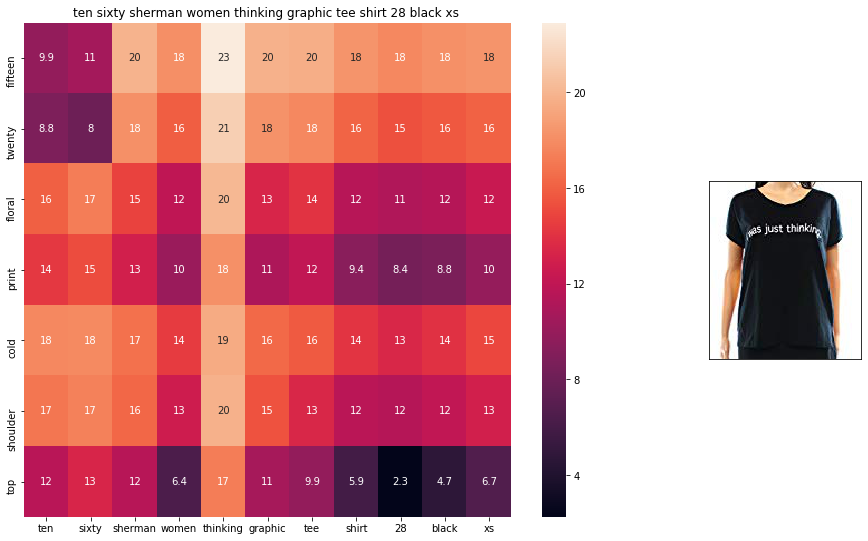

ASIN : B07336RVXQ
Brand : Ten Sixty Sherman
euclidean distance from input : 4.395012


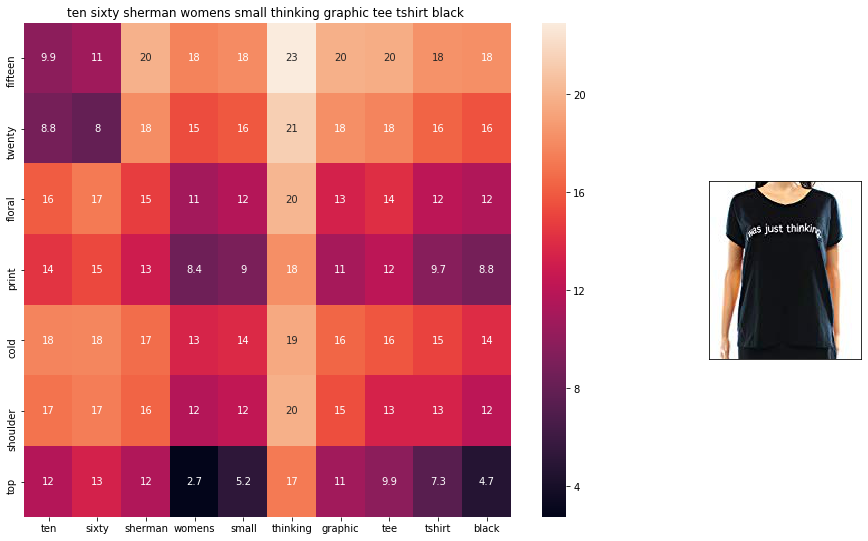

ASIN : B073H2ZXVL
Brand : Ten Sixty Sherman
euclidean distance from input : 4.395152


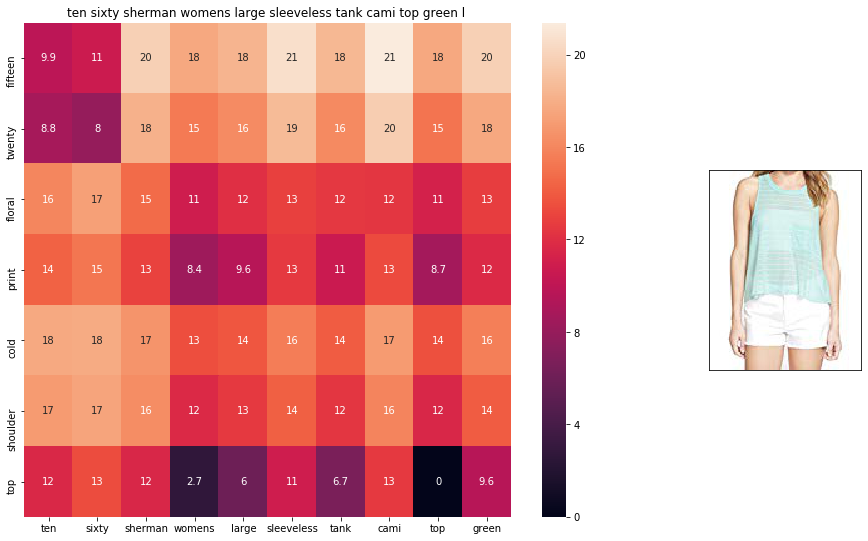

ASIN : B01JS7D6WO
Brand : Ten Sixty Sherman
euclidean distance from input : 4.4075327


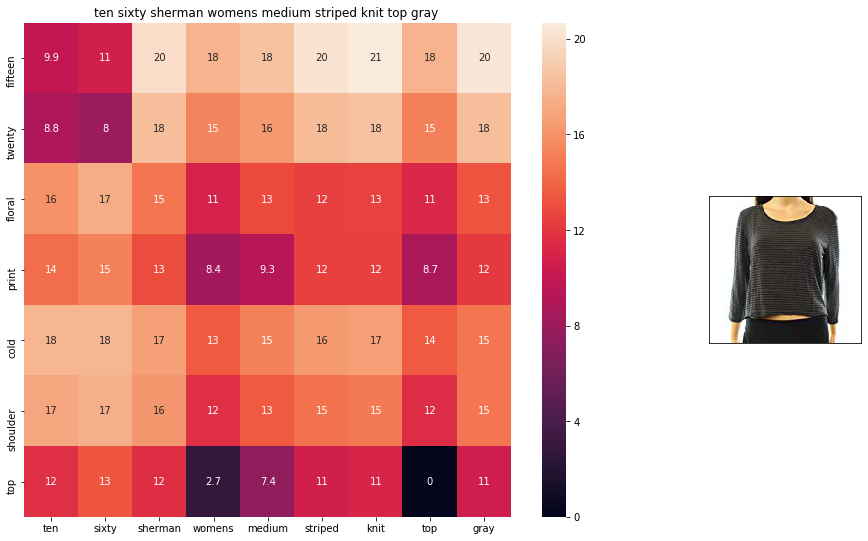

ASIN : B071SM81Z4
Brand : Ten Sixty Sherman
euclidean distance from input : 4.466355


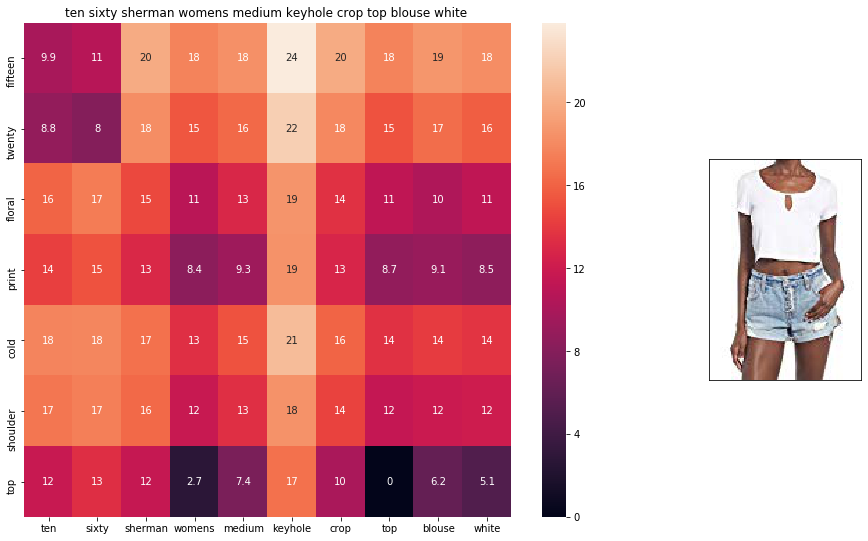

ASIN : B06ZXXWYG4
Brand : TEN SIXTY SHERMAN
euclidean distance from input : 4.4879556


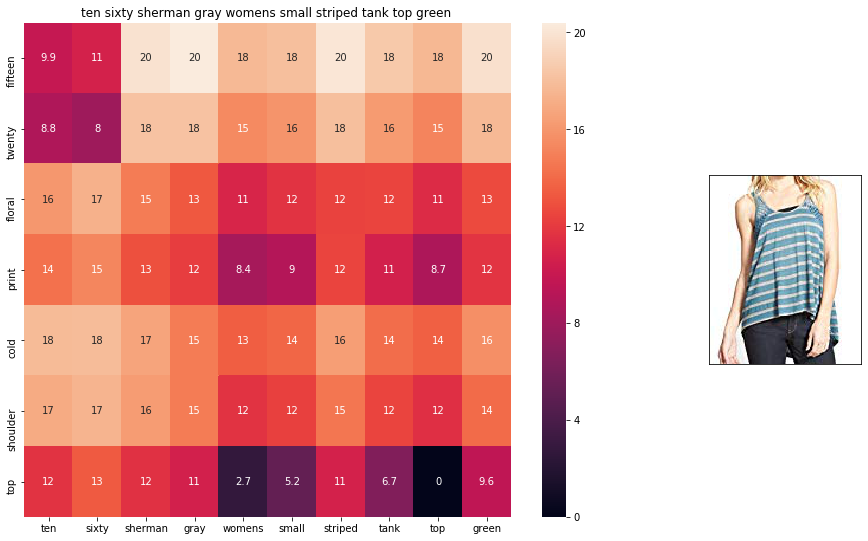

ASIN : B01LXS37QB
Brand : Ten Sixty Sherman
euclidean distance from input : 4.5112844


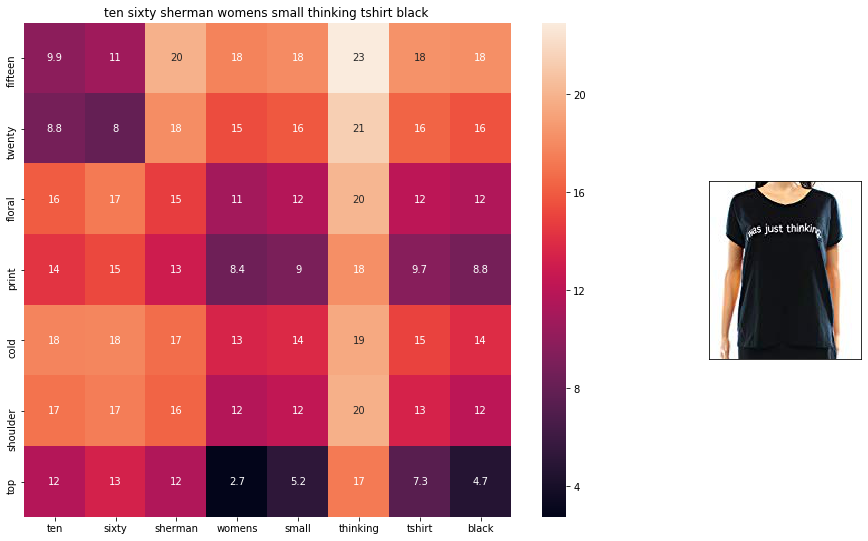

ASIN : B07318FFVS
Brand : Ten Sixty Sherman
euclidean distance from input : 4.5152082


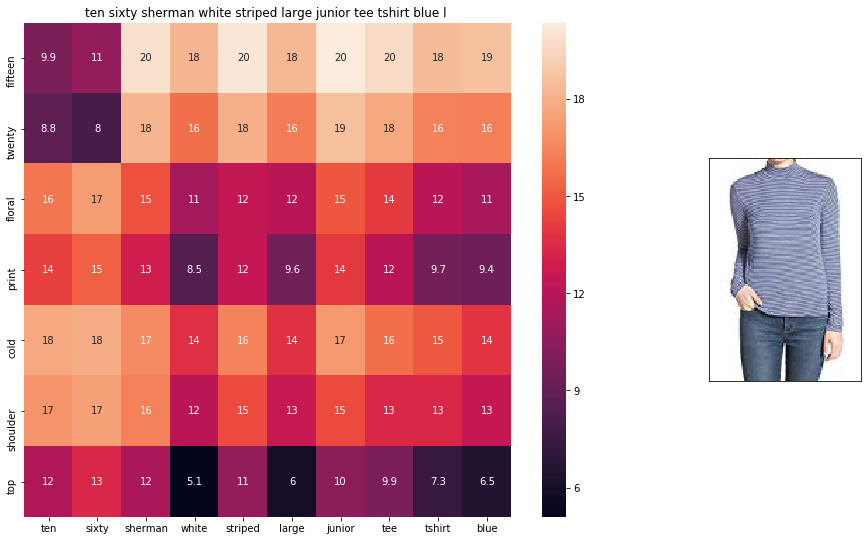

ASIN : B01ISBFCKA
Brand : Ten Sixty Sherman
euclidean distance from input : 4.527193


In [33]:
def weighted_w2v_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'weighted')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)

weighted_w2v_model(125, 20)